<a href="https://colab.research.google.com/github/vanditasharma777/Classification-over-MNIST-Dataset/blob/vanditasharma777-patch-1/CNN_VGG16_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten,Softmax,Conv2D, MaxPooling2D
from keras import backend as k
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.utils import np_utils
import sklearn
batch_size = 64
num_classes = 10
epochs = 12


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [3]:
img_rows,img_cols = 28,28
#print the new label
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test.shape,y_train.shape

((10000, 10), (60000, 10))

In [5]:
# Build the CNN model
model = keras.models.Sequential()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist=model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test)).history                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
score = model.evaluate(x_test, y_test, verbose=0)                                              
print('Test loss:', score[0])
print('Test accuracy:', score[1])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.2205 - accuracy: 0.9320 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 2/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0822 - accuracy: 0.9761 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 3/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 4/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 5/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0449 - val_accuracy: 0.9860
Epoch 6/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 7/12
60000/60000 [==============================] 

In [6]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
test_predictions = model.predict_classes(x_test, batch_size=128, verbose=0) 
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
print("confusion matrix")
cm = confusion_matrix(rounded_labels, test_predictions)
print(cm)
print("classification report:")
print(classification_report(rounded_labels, test_predictions, target_names= None))
print("Accuracy score:")
print(accuracy_score(rounded_labels,test_predictions))


confusion matrix
[[ 978    0    0    0    0    0    0    0    1    1]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    1 1024    1    0    0    0    5    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   1    0    0    0  958    0    3    0    2   18]
 [   2    0    0    7    0  881    1    1    0    0]
 [   8    3    0    1    1    4  940    0    1    0]
 [   0    2    3    1    0    0    0 1019    1    2]
 [   4    0    1    2    0    0    0    1  964    2]
 [   1    1    0    2    2    1    0    1    2  999]]
classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       

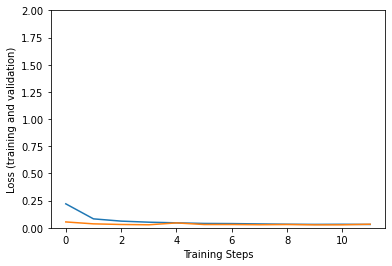

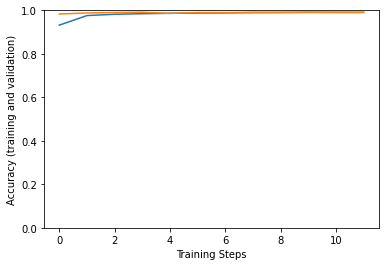

In [7]:

import matplotlib.pylab as plt
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [13]:
pip install h5py


In [14]:
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 

Saved model to disk
Loaded model from disk


In [15]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist=loaded_model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test)).history                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
score = loaded_model.evaluate(x_test, y_test, verbose=0)                                              
print('Test loss:', score[0])
print('Test accuracy:', score[1])  

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0280 - val_accuracy: 0.9919
Epoch 2/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0291 - val_accuracy: 0.9916
Epoch 3/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0257 - val_accuracy: 0.9918
Epoch 4/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 5/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0319 - val_accuracy: 0.9916
Epoch 6/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 7/12
60000/60000 [==============================] 

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
test_predictions = model.predict_classes(x_test, batch_size=128, verbose=0) 
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
print("confusion matrix")
cm = confusion_matrix(rounded_labels, test_predictions)
print(cm)
print("classification report:")
print(classification_report(rounded_labels, test_predictions, target_names= None))
print("Accuracy score:")
print(accuracy_score(rounded_labels,test_predictions))


confusion matrix
[[ 978    0    0    0    0    0    0    0    1    1]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    1 1024    1    0    0    0    5    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   1    0    0    0  958    0    3    0    2   18]
 [   2    0    0    7    0  881    1    1    0    0]
 [   8    3    0    1    1    4  940    0    1    0]
 [   0    2    3    1    0    0    0 1019    1    2]
 [   4    0    1    2    0    0    0    1  964    2]
 [   1    1    0    2    2    1    0    1    2  999]]
classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       

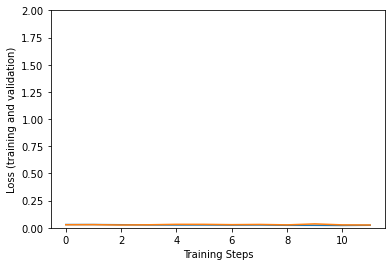

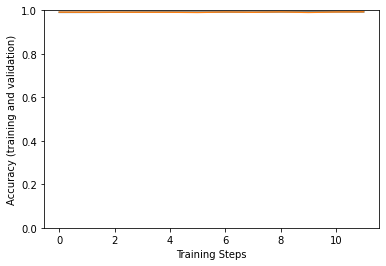

In [17]:
import matplotlib.pylab as plt
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [3]:
! git clone https://github.com/mtobeiyf/keras-flask-deploy-webapp.git

Cloning into 'keras-flask-deploy-webapp'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 120 (delta 0), reused 1 (delta 0), pack-reused 117
Receiving objects: 100% (120/120), 42.42 KiB | 4.24 MiB/s, done.
Resolving deltas: 100% (43/43), done.


VGG16 for MNIST DATASET

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
from keras.utils import np_utils
# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train.shape,y_test.shape


((60000, 10), (10000, 10))

In [ ]:
## only for mnist becuase mnist is grayscale so , we are converting them rgb (three dimensional)
import cv2
dim = (48, 48)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 48x48 rgb values
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
x_train_rgb = np.stack([rgb_list],axis=4)
x_train_rgb_3d = np.squeeze(x_train_rgb, axis=4)
print(x_train_rgb_3d.shape)

(60000, 48, 48, 3)


In [ ]:
## only for mnist becuase mnist is grayscale so , we are converting them rgb (three dimensional)

import cv2
dim = (48, 48)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list = []
#convert X_train data to 48x48 rgb values
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape)
    
x_test_rgb = np.stack([rgb_list],axis=4)
x_test_rgb_3d = np.squeeze(x_test_rgb, axis=4)
print(x_test_rgb_3d.shape)

(10000, 48, 48, 3)


In [ ]:
vgg16_model = VGG16(weights = 'imagenet',include_top=False,input_shape=(48,48,3))
vgg16_model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: # go through until last one layer
    model.add(layer)
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)      

In [ ]:
from keras.optimizers import Adam,Adagrad

In [ ]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_rgb_3d, y_train,batch_size=64,epochs=1,verbose=1,validation_data=(x_test_rgb_3d, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1033 - accuracy: 0.9710 - val_loss: 0.0360 - val_accuracy: 0.9896


In [ ]:
import matplotlib.pylab as plt
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [ ]:
model.compile(Adagrad(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist= model.fit(x_train_rgb_3d, y_train,batch_size=64,epochs=100,verbose=1,validation_data=(x_test_rgb_3d, y_test)).history
score = model.evaluate(x_test, y_test, verbose=0)                                              
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0133 - val_accuracy: 0.9961
Epoch 2/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 3/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0147 - val_accuracy: 0.9961
Epoch 4/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0145 - val_accuracy: 0.9963
Epoch 5/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0141 - val_accuracy: 0.9962
Epoch 6/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0149 - val_accuracy: 0.9961
Epoch 7/100
60000/60000 [==============================] - 65s

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
test_predictions = model.predict_classes(x_test, batch_size=128, verbose=0) 
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
print("confusion matrix")
cm = confusion_matrix(rounded_labels, test_predictions)
print(cm)
print("classification report:")
print(classification_report(rounded_labels, test_predictions, target_names= None))
print("Accuracy score:")
print(accuracy_score(rounded_labels,test_predictions))

In [ ]:
import matplotlib.pylab as plt
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [ ]:
def change_model(model, new_input_shape=(None,40, 40, 1)):
    model._layers[0].batch_input_shape= new_input_shape
    # rebuild model architecture by exporting and importing via json
    new_model = keras.models.model_from_json(model.to_json())
    # Copy weights from old model to new one
    for layers in new_model.layers:
      try:
        layers.set_weights(model.get_layer(name=layers.name).get_weights())
        print("Loaded layer {}".format(layers.name))
      except:
          print("Could not transfer weights for layer {}".format(layers.name))
      return new_model 
      